14 K Nearest Neighbors

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
# in job interviews is common to have a dataset with random columns name and a given target column
# the aim is to find the best columns to use in the model and the relationship between them
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(
    # make the scaler fit the data without the target column
    df.drop('TARGET CLASS', axis=1)
)

StandardScaler()

In [6]:
# perform a transformation that will standardize the data (mean = 0, variance = 1)
# in order to make the data have the same scale
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
# create a new dataframe with the scaled features and the same columns name
# scaling the data is important because the KNN classifier predicts the class of a given test observation
df_feat = pd.DataFrame(
    scaled_features,
    columns=df.columns[:-1]
)
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=1
)

In [13]:
knn.fit(X_train, y_train)

p = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, p))
print(classification_report(y_test, p))

[[134  20]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       154
           1       0.87      0.95      0.91       146

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [15]:
# in order to find the best k value it's possible to loop on a range of values
# and use the loop index to train and predict the model with different k values.
# by comparing the error rate it's possible to find the best k value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    p_i = knn.predict(X_test)
    error_rate.append(
        # average error rate, it's the mean of predicted values that are different from the real values
        np.mean(p_i != y_test)
    )

Text(0, 0.5, 'Error Rate')

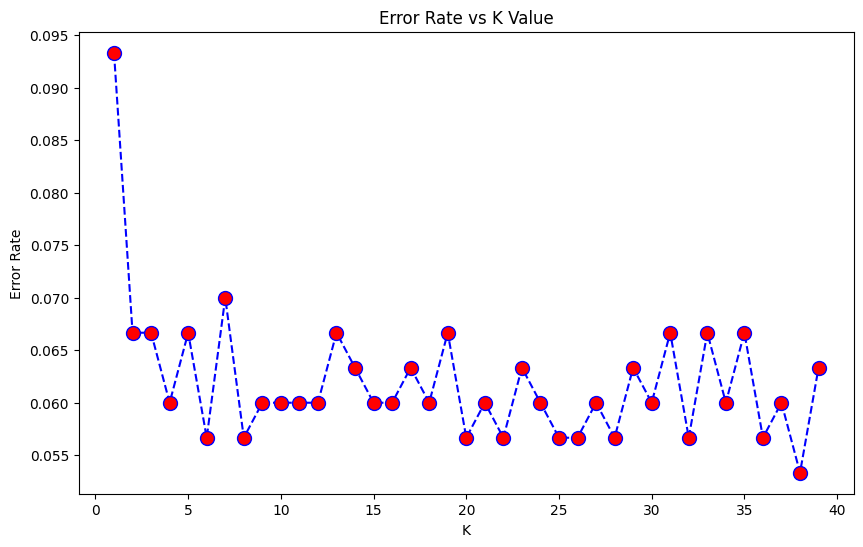

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# it's possible to see that it starts with a high error rate and then it decreases
# a suitable choice for k is 17 because it's the first value that has a low error rate.
# increasing the k value will not improve the model because it will start to overfit the data
# and it will take more time to train the model

In [19]:
model = KNeighborsClassifier(
    # best key value found in previous step
    n_neighbors=17
)

model.fit(X_train, y_train)

p = model.predict(X_test)

print(confusion_matrix(y_test, p))
print(classification_report(y_test, p))


[[141  13]
 [  6 140]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       154
           1       0.92      0.96      0.94       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

